*Group 30 Contributers: Zhong Tan, Nicholas Low, Stephen Huang, Liu Ruiqi* 

*To group 30 members: add your name here as proof of contribution*

To edit, go inside Jupyter. Click the diamond icon on the left bar. Click the cloud down arrow. Edit changes. Save. The project is now under [Changed]. Hover over it and click on the [+]. Fill in the summary with what you changed. Click [COMMIT]. Click the cloud up arrow. Everything is now updated.

| Figure No.| Description|
|-|-|
|1.0| Shows 6 of the rows from the dataset USA_cars_datasets.csv|
|1.2| Shows the scatterplots with price vs year and mileage vs year of the dataset "cars"|
|1.3| Shows the car dataset with outliers removed|
|1.4| Shows the scatterplots of price vs year and mileage vs year of the dataset "car_all"| 
|1.5| Shows the relationship of the variables price, year, and mileage from the dataset car_all|
|1.6| Shows the plots of the linear regression model fitted onto the dataset car_all for variables year and mileage|
|1.61| Shows number of k neighbors of the KNN regression model that produces the smallest RMSE error|
|1.7| Shows the plots of the KNN regression model fitted onto the dataset car_all for variables year and mileage|
|1.8| Shows the predicition of the price for a used car made in 2015 with 100,000 miles in USD|
|1.9| Shows the plots of the predicted cost in relation to year and mileage|

# Using R and knn regression to predict used car costs in the US based on mileage and year

**Introduction**

Being able to predict used car prices can save families thousands of dollars. By using the progam language R, we can plot graphs and get a prediction for how much a car may cost, using a method called regression to predict a numerical value for a used car's price based on factors we enter.

We will be predicting the cost of a used car based on mileage and year. As background knowledge, we know that a substantial factor in car price is the year of its production. Newer generations of cars carrying more recent technology tend to cost more in comparison to older products with less features. We will apply this knowledge to used cars in our prediction. Another considerable factor is the condition that the car is sold in. Used cars that have been in use for longer periods of time are often in worse condition in used cars that have been used less. These products that have been used extensively are generally valued less than their counterparts that are in better conditions. With this in mind, we will be choosing mileage, a determinant of the condition of the car, as the second variable for our model and predictions.

In order to make predictions on car prices, we will want to determine the best regression model, KNN or linear for the data set. To do so, we will need to visualize our models first to find the optimal k-value. We will be using American used car prices obtained from the web as the dataset for this experiment and have placed it into our group's repository for easy access. The dataset describes the prices of used cars in USD as well as some of the cars specs, including mileage and year of production. To extract this dataset, we will start with read_csv() of our comma seperated sheet in .csv format, USA_cars_datasets.csv.

**Methods and Results**

As outlined in our introduction, we will be using a regression model to predict the prices of used cars based off of their year of production and mileage. In order to do this, we will have to draw a comparative between KNN regression and linear regression to determine which model is more suitable for our project. We will then visualize the models on their graphs and determine which model is most appropriate for our objective. After, we will use our model to predict the cost for a 2015 car with 100,000 miles.

To begin, we must load our libraries:

In [1]:
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)
library(tidymodels)
library(GGally)
library(ISLR)
set.seed(0)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

After completing the installation of the relevant library packages for our project, we can move onto the next step; organizing and tidying the dataset.

Firstly, we must read the data that we have derived from the web and transfer it into a dataframe object using the **"read_csv()"** function:

In [3]:
car <- read_csv("https://raw.githubusercontent.com/zhtgeneral/Group-30-Official/main/Data/USA_cars_datasets.csv")
head(car)

New names:
• `` -> `...1`
Rows: 2499 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): brand, model, title_status, color, vin, state, country, condition
dbl (5): ...1, price, year, mileage, lot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left


*Figure 1.0 shows 6 of the rows from the dataset USA_cars_datasets.csv*     


The columns in the dataset above are number, price, brand, model, year, title, mileage, color, vin, lot, state, country and condition. We have 1 variable per column. We notice that we have 1 observation per row. This means we have a tidy dataset.

Since we're only looking at mileage and year as indicators of car price, we will exclusively select for those columns using the **"select()"** function.

In [4]:
car <- car |>
       select(price, year, mileage)
head(car)

price,year,mileage
<dbl>,<dbl>,<dbl>
6300,2008,274117
2899,2011,190552
5350,2018,39590
25000,2014,64146
27700,2018,6654
5700,2018,45561


*Figure 1.1 shows 6 of the rows from the data renamed to "car" and that has selected for only columns price, year, and mileage.*    

The dataset above represents our reduced data. With only 3 columns, it will be much easier to work on. 

Now let's get an idea for the relationship between these variables and car price. We can use **"ggplot()"** and all related functions from the **tidyverse** library to plot two graphs that depict the price of used cars as a function of the variables "year" and "mileage".

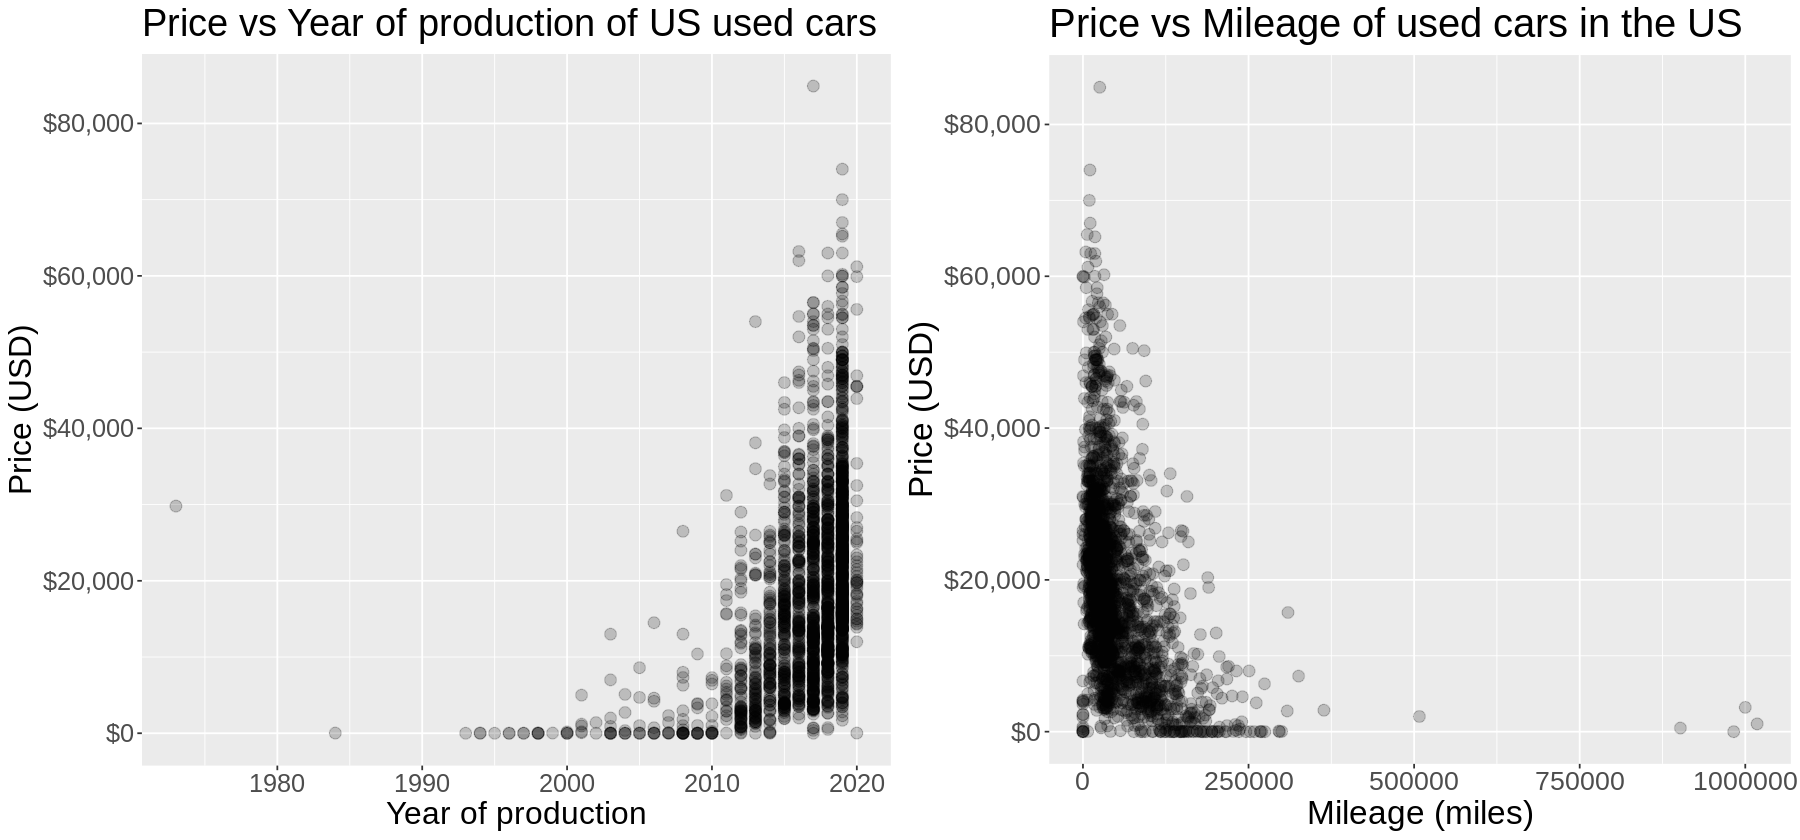

In [155]:
#----------------------------------------------------------# Setting plot sizes

options(repr.plot.width = 15, repr.plot.height = 7)

#------------------------------------------------------# Plotting year vs price for dataset car

car_year <- car |>
            ggplot(aes(x = year, y = price)) +
            geom_point(size = 3,
                       alpha = 0.2) +
            labs(x = "Year of production",
                 y = "Price (USD)",
                 title = "Price vs Year of production of US used cars") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 19))

#------------------------------------------------------# Plotting Mileage vs price for dataset car

car_mileage <- car |>
            ggplot(aes(x = mileage, y = price)) +
            geom_point(size = 3,
                       alpha = 0.2) +
            labs(x = "Mileage (miles)",
                 y = "Price (USD)",
                 title = "Price vs Mileage of used cars in the US") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 20))

#----------------------------------------------------------# Putting both plots together

plot_grid(car_year, car_mileage, ncol = 2)

*Figure 1.2 shows the scatterplots describing price as a function of the year of production and price as a function of mileage derived from the dataset "cars".*    

It looks like we have some outliers that might skew our data. Let's filter so we get rid of cars made before 1990 and mileage to below 500,000 miles.

In [156]:
#----------------------# Selecting only price, year, and mileage
car_all <- car |>
           select(price, year, mileage) |>
           filter(year > 1990,
                  mileage < 500000)
car_all

price,year,mileage
<dbl>,<dbl>,<dbl>
6300,2008,274117
2899,2011,190552
5350,2018,39590
25000,2014,64146
⋮,⋮,⋮
9200,2018,34553
9200,2018,31594
9200,2018,32557
9200,2018,31371


*Figure 1.3 shows the car dataset with outliers removed. It is renamed "car_all".*    

Now for a visual representation of these plots:

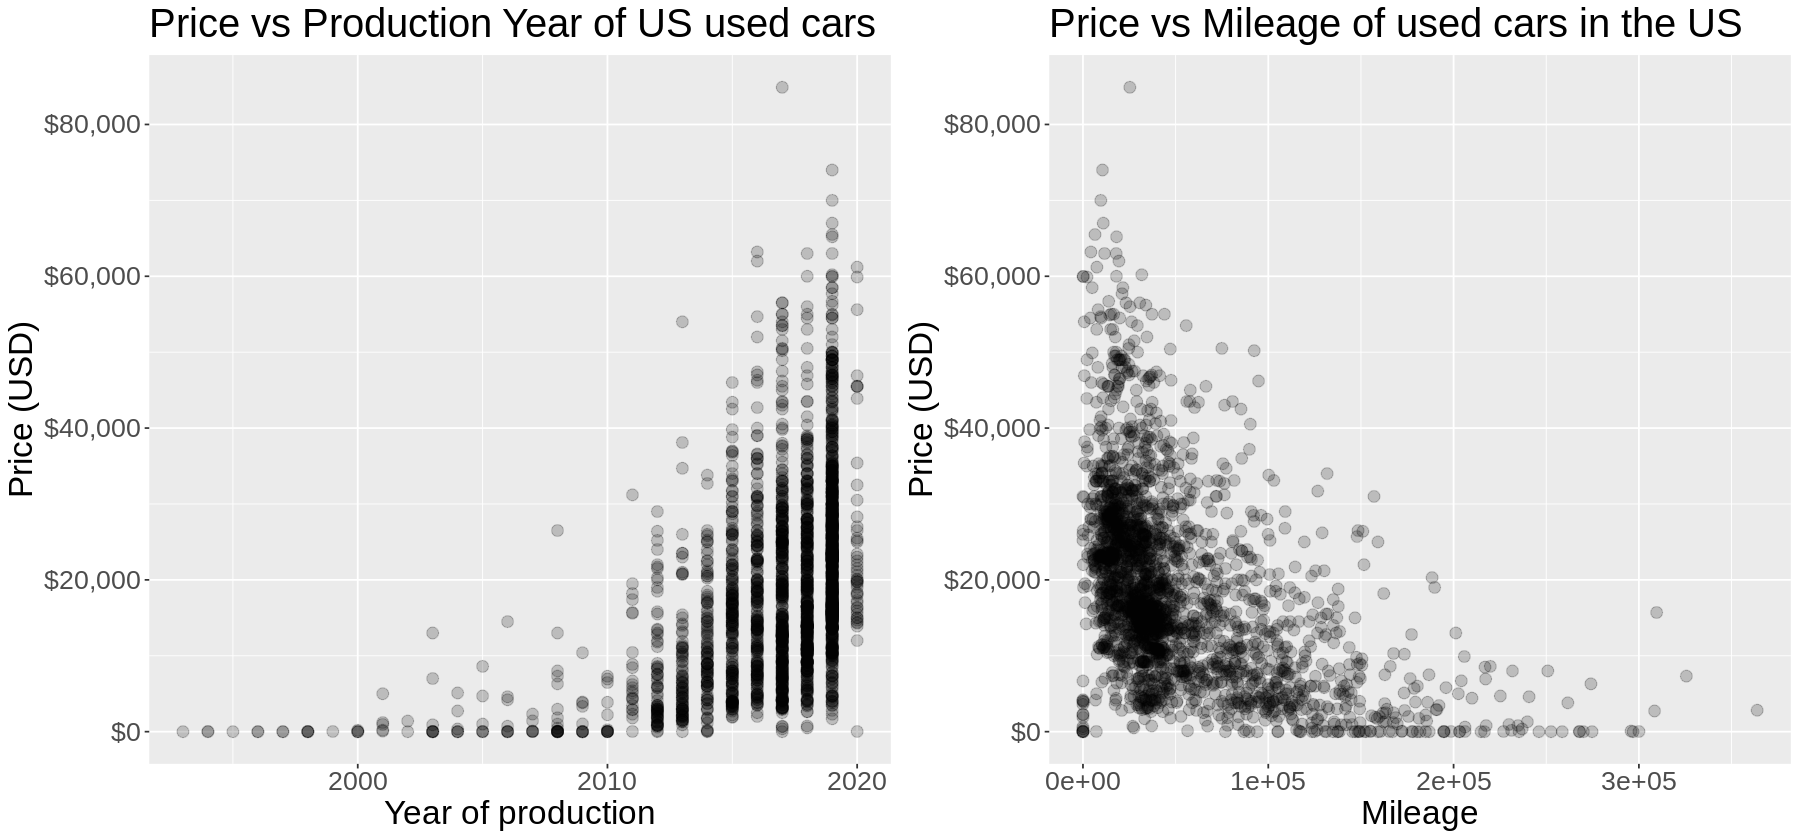

In [157]:
#-----------------------------------------------------# Creating Price vs Year plot for dataset car_all

fcar_year <- car_all |>
            ggplot(aes(x = year, y = price)) +
            geom_point(size = 3,
                       alpha = 0.2) +
            labs(x = "Year of production",
                 y = "Price (USD)",
                 title = "Price vs Production Year of US used cars") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 20))

#-----------------------------------------------------# Creating Price vs Mileage plot for dataset car_all

fcar_mileage <- car_all |>
            ggplot(aes(x = mileage, y = price)) +
            geom_point(size = 3,
                       alpha = 0.2) +
            labs(x = "Mileage (miles)",
                 y = "Price (USD)",
                 title = "Price vs Mileage of used cars in the US") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 20))

#-----------------------------------------------------------------# Putting both plots together

plot_grid(fcar_year, fcar_mileage, ncol = 2)

*Figure 1.4 shows the scatterplots describing the price as a function of the year of production and price as a function of mileage derived from the dataset "car_all". This time, outliers are removed.*   

These are our graphs with outliers removed. Outliers are removed so they don't interfere with our engines and alter the final prediction. From the graph, it is clear that there is a correlation between mileage, year of production, and the price of used cars. We can see a trend that suggests that more recent models of used cars cost more than older models. It is also evident that worn cars (with more mileage) generally cost much less than cars with less mileage. Let's use ggpairs to get a better visualization on these relationships.

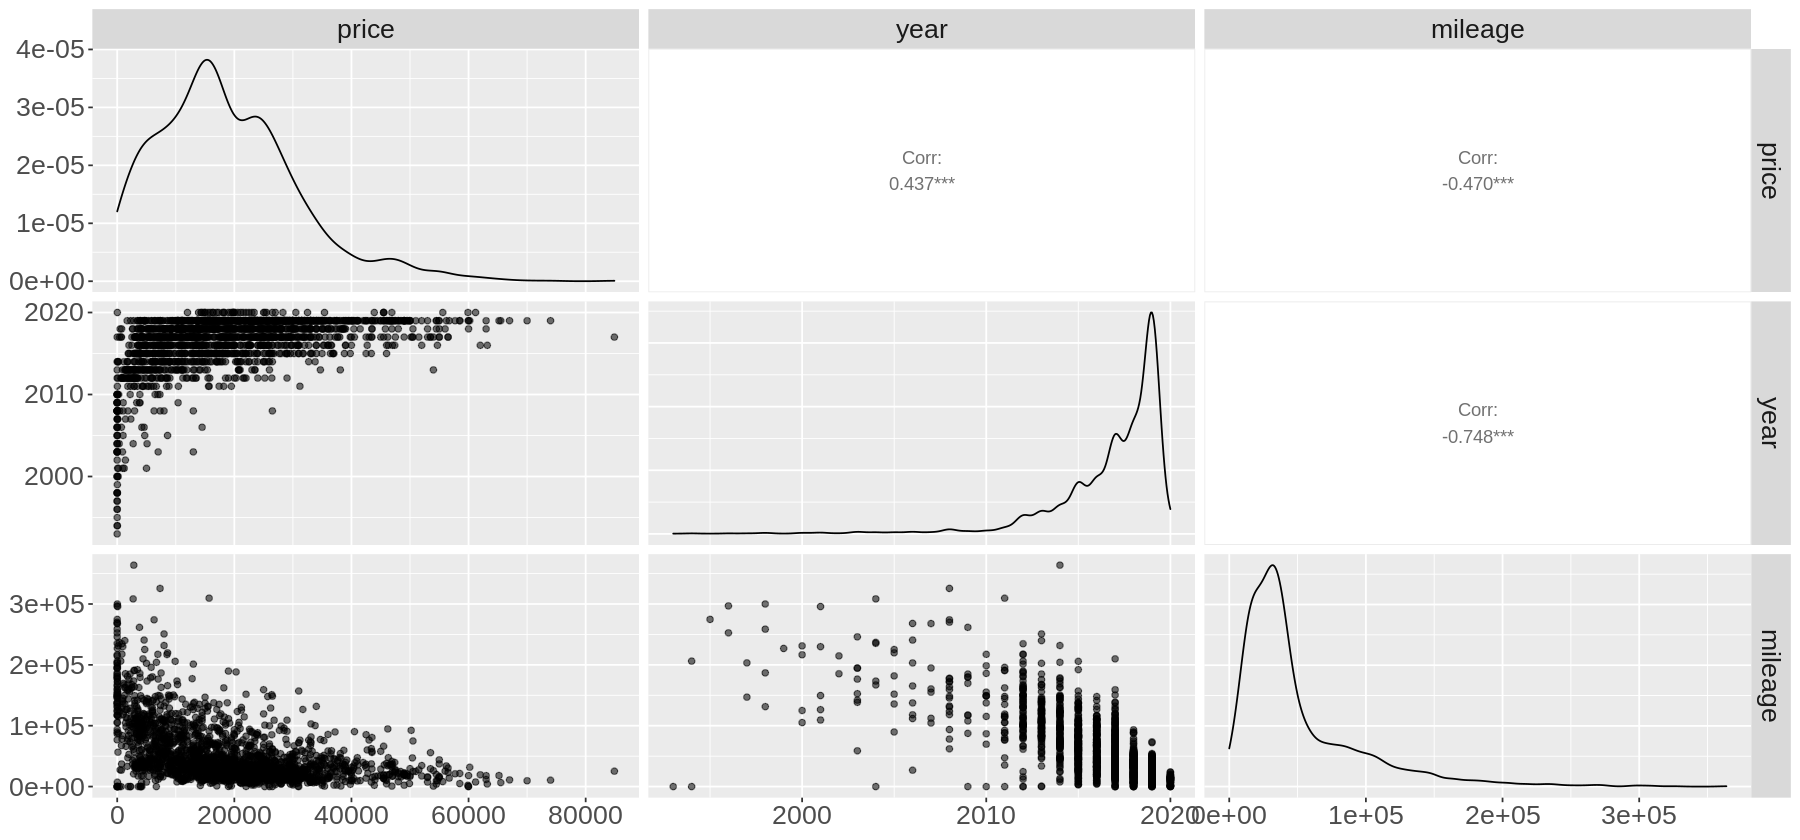

In [143]:
car_all_plot <- car_all |>
                ggpairs(aes(alpha = 0.2)) +
                theme(text = element_text(size = 20))
car_all_plot

*Figure 1.5 shows the comparison of the variables price, year, and mileage from the dataset "car_all".* 

The above graph represents how the variables in our data affect each other. One interesting thing we find from the above information is that newer used cars tend to have lower mileage (bottom middle), which is sensible as cars that have existed for a shorter period of time, have probably been in use for shorter periods of time as well. As for predicting the price of these used cars, it seems plausible to use linear regression to represent the trends portrayed in the above graphs. First, let's plot both the KNN and linear regression models to see which model is more suitable for our purposes and will result in the most reliable prediction.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



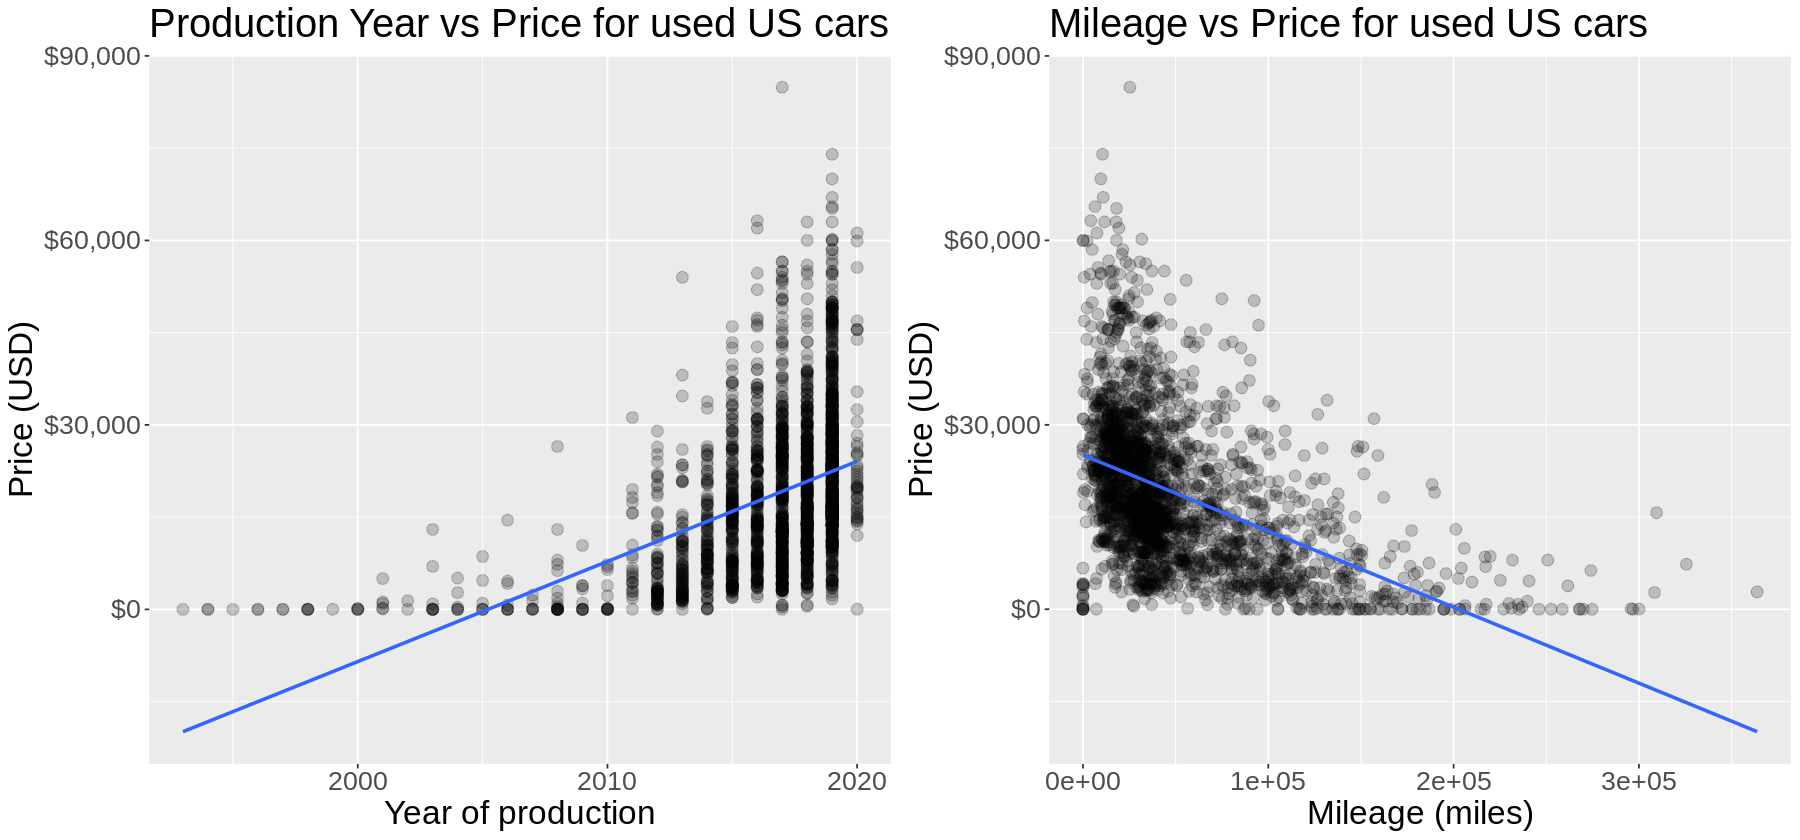

In [102]:
#-----------------------------------------------------------------# Splitting up our data into 2 sets

car_split <- initial_split(car_all, prop = 0.75, strata =price)
car_train <- training(car_split)
car_test <- testing(car_split)

#------------------------------------------------------------------------# Creating our linear regression model

car_recipe <- recipe(price ~ mileage, year, data = car_train) |>
              step_scale(all_predictors()) |>
              step_center(all_predictors())

lin_spec <- linear_reg() |>
            set_engine("lm") |>
            set_mode("regression")

lin_fit <- workflow() |>
           add_recipe(car_recipe) |>
           add_model(lin_spec) |>
           fit(data = car_train)

lin_car_results <- lin_fit |>
                   predict(car_test) |>
                   bind_cols(car_test) |>
                   metrics(truth = price, estimate = .pred) |>
                   filter(.metric == "rmse") |>
                   pull()

#-------------------------------# Setting the plot sizes

options(repr.plot.width = 15)

#-------------------------------# Plot for year vs price linear regression

ln_year_plot <- car_all |>
            ggplot(aes(x = year, y = price)) +
            geom_point(alpha = 0.2,
                       size = 3) +
            geom_smooth(method = "lm", se = FALSE, size = 1, alpha = 0.75) +
            ylim(0, 90000) +
            labs(title = "Production Year vs Price for used US cars",
                 x = "Year of production",
                 y = "Price (USD)") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 20))

#-------------------------------# Plot for mileage vs price linear regression

ln_mi_plot <- car_all |>
            ggplot(aes(x = mileage, y = price)) +
            geom_point(alpha = 0.2,
                       size = 3) +
            geom_smooth(method = "lm", se = FALSE, size = 1, alpha = 0.75) +
            labs(title = "Mileage vs Price for used US cars",
                 x = "Mileage (miles)",
                 y = "Price (USD)") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 20))

#--------------------------------------------------------------------# Putting the plots together

plot_grid(ln_year_plot, ln_mi_plot, ncol = 2)

*Figure 1.6 shows the plots of the linear regression model fitted into the dataset "car_all" for each variable describing price; year of production and mileage.* 

Above are our linear regressions models plotted against our data in which the blue line is the estimation of a car's cost. We think this model is inaccurate because it predicts that at some point, with enough mileage, a car will reach a point in which it should be completely free. Perhaps KNN regression would work better. To begin, we'll find the best k value from 1 to 500 using vfolds = to 5 for our KNN regression.

In [10]:
#--------------------------------------------------------------# Setting up K values for KNN regression

tune_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("regression")

knn_vfold <- vfold_cv(car_train, v = 5, strata = price)

knn_fit <- workflow() |>
           add_recipe(car_recipe) |>
           add_model(tune_spec)

grid_vals <- tibble(neighbors = seq(from = 1, to = 500, by = 50))

knn_car_results <- knn_fit |>
                    tune_grid(resamples = knn_vfold, grid = grid_vals) |>
                    collect_metrics() |>
                    filter(.metric == "rmse") |>
                    filter(mean == min(mean))
knn_car_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
201,rmse,standard,10335.15,5,244.709,Preprocessor1_Model05


*Figure 1.61 shows number of k neighbors of the KNN regression model that produces the smallest RMSE error.* 

We see that we want k = 201 in our Knn regression. Let's put it in and see the model on a graph.

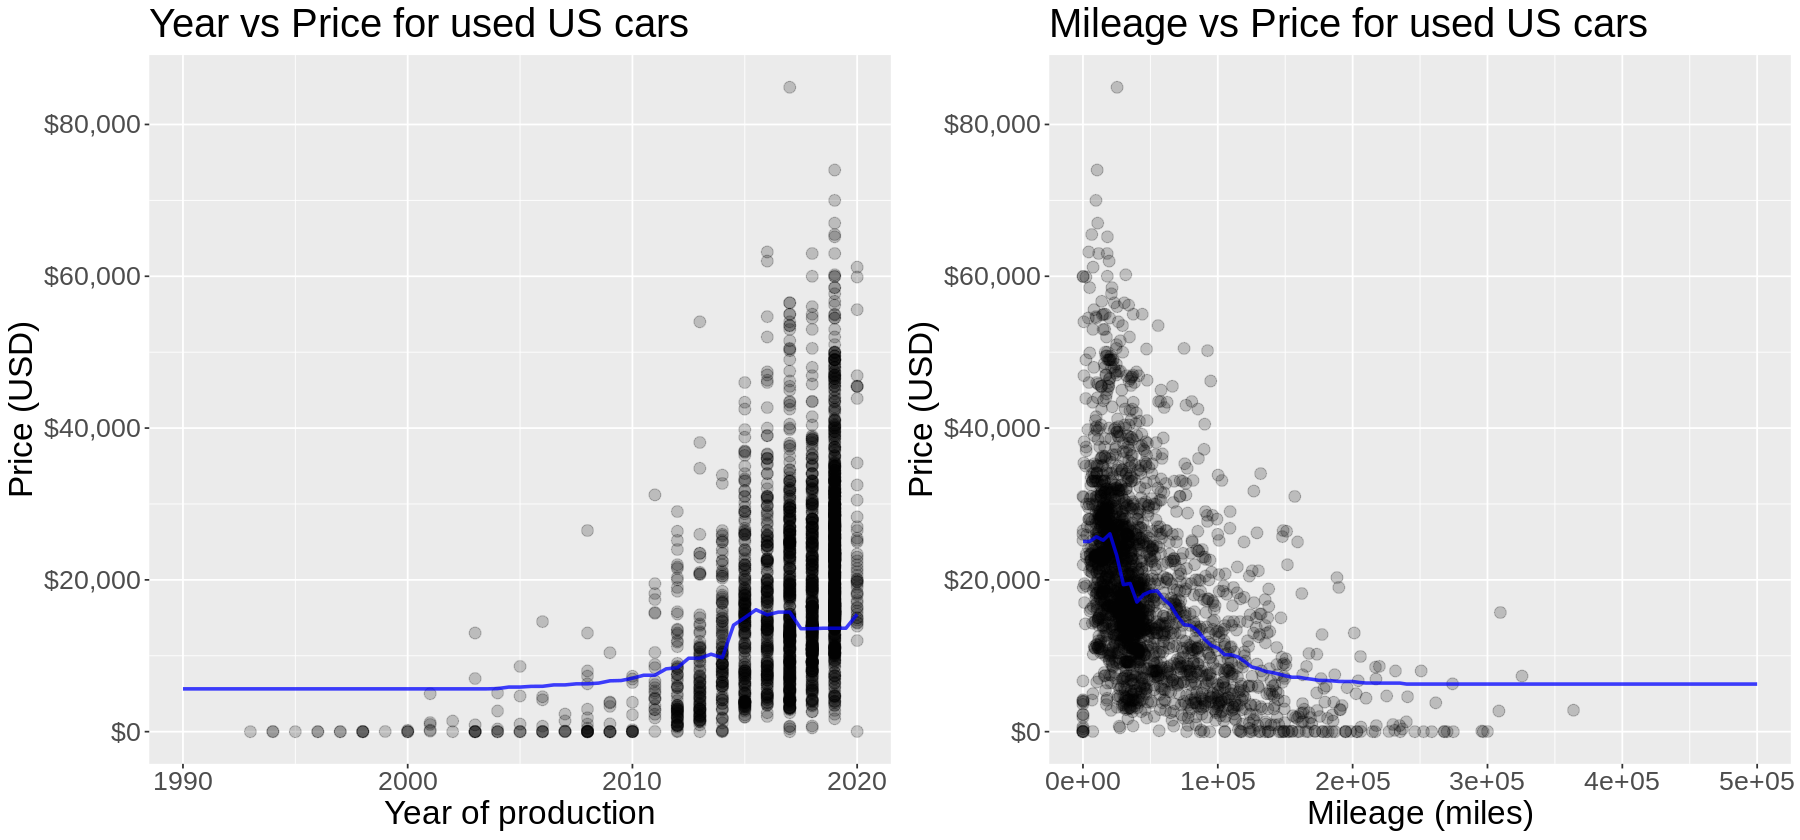

In [62]:
#-----------------------------# Setting the graph size

options(repr.plot.width = 15)

#----------------------------------------------------------------# Below is the KNN model with set k values

knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = 201) |>
            set_engine("kknn") |>
            set_mode("regression")

#------------------------------------------------------------------------# Below is the plot for year vs price knn regression

knn_year_pred <- tibble(year = seq(from = 1990, to = 2020, by = 0.5))
knn_year_recipe <- recipe(price ~ year, data = car_train) |>
              step_scale(all_predictors()) |>
              step_center(all_predictors())
knn_year_fit <- workflow() |>
           add_recipe(knn_year_recipe) |>
           add_model(knn_spec) |>
           fit(data = car_train)
knn_year_pred <- knn_year_fit |>
            predict(knn_year_pred) |>
            bind_cols(knn_year_pred)
knn_year_plot <- car_all |>
            ggplot(aes(x = year, y = price)) +
            geom_point(alpha = 0.2,
                       size = 3) +
            geom_line(data = knn_year_pred,
                      mapping = aes(x = year, y = .pred),
                      color = "blue",
                      size = 1, 
                      alpha = 0.75) +
            labs(title = "Year vs Price for used US cars", 
                 x = "Year of production",
                 y = "Price (USD)") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 20))

#-----------------------------------------------------------------------#Below is price vs mileage knn regression

knn_mi_pred <- tibble(mileage = seq(from = 0, to = 500000, by = 5000))
knn_mi_fit <- workflow() |>
           add_recipe(car_recipe) |>
           add_model(knn_spec) |>
           fit(data = car_train)
knn_mi_pred <- knn_mi_fit |>
            predict(knn_mi_pred) |>
            bind_cols(knn_mi_pred)
knn_mi_plot <- car_all |>
            ggplot(aes(x = mileage, y = price)) +
            geom_point(alpha = 0.2,
                       size = 3) +
            geom_line(data = knn_mi_pred,
                      mapping = aes(x = mileage, y = .pred),
                      color = "blue",
                      size = 1,
                      alpha = 0.75) +
            labs(title = "Mileage vs Price for used US cars",
                 x = "Mileage (miles)", 
                 y = "Price (USD)") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 20))

#----------------------------------------------------------------#Below is plotting the graphs beside each other

plot_grid(knn_year_plot, knn_mi_plot, ncol = 2)

*Figure 1.7 shows the KNN regression model fitted to dataset car_all and depicts the plots describing price as a function of the year of production and mileage*

These are our KNN regression plots for mileage and year predicting price. The blue line indicates the predicted cost of cars in USD. As can be seen above, KNN regression works better than linear regression because the model does not reach a point in which cars have no value (a price of 0 USD). With the model that we have selected, we can now predict the price of any used car. For this exploration, we will be predicting the price of a car produced in 2015 with a mileage of 100,000 miles.

In [13]:
#-------------------------------------# Entering our car's values

our_car <- tibble(price = 0,
                  mileage = 100000,
                  year = 2015)

#-----------------------------------------------------------------------------# Setting up the prediction

knn_final_fit <- workflow() |>
           add_recipe(car_recipe) |>
           add_model(knn_spec) |>
           fit(data = car_train)
knn_final_summary <- knn_final_fit |>
                    predict(our_car) |>
                    bind_cols(our_car) |>
                    metrics(truth = price, estimate = .pred) |>
                    filter(.metric == "rmse")
knn_final_summary

Warning message:
“A correlation computation is required, but the inputs are size zero or one and the standard deviation cannot be computed. `NA` will be returned.”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,10994.03


*Figure 1.8 shows the predicition of the price for a used car made in 2015 with 100,000 miles in USD.*

We predict that a used car produced in 2015 with 100,000 miles will cost around $10,994.03 US dollars. From a glance, this seems like a reasonable result. Let's visualize this prediction plotted against our dataset car_all.

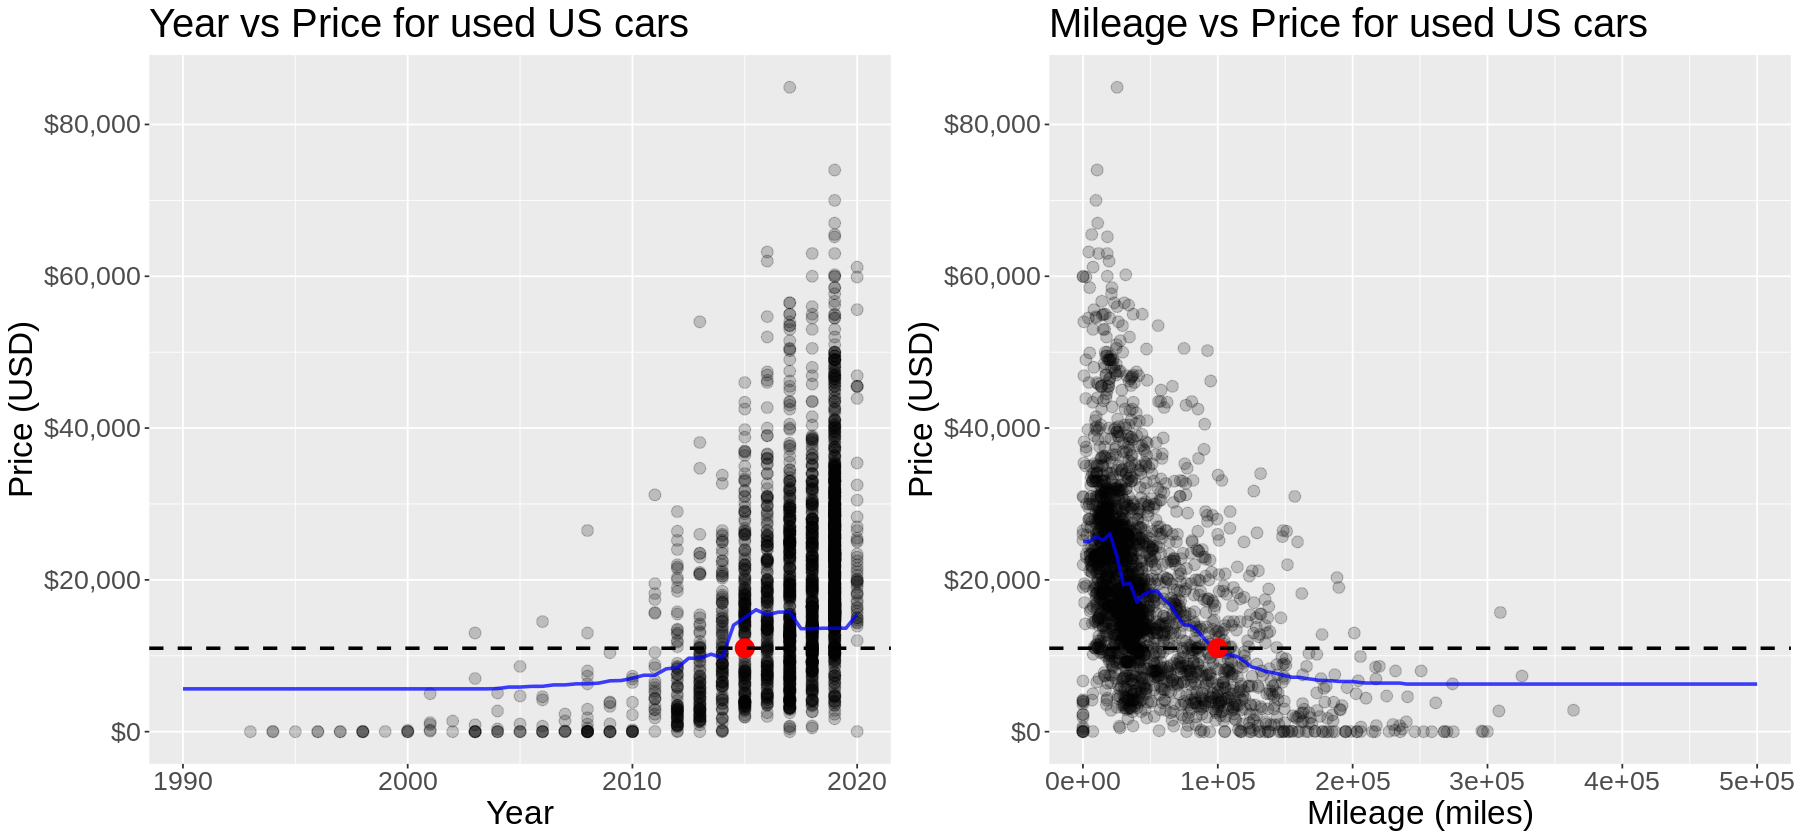

In [ ]:
#-----------------------------------------# Creating tibble for visualizing prediction

our_pred <- tibble(price = 10994,
                  mileage = 100000,
                  year = 2015)

#---------------------------------------------------# Plotting the prediction against car_all for mileage

car_mi_plot <- car_all |>
            ggplot(aes(x = mileage, y = price)) +
            geom_point(alpha = 0.2,
                       size = 3) +
            geom_line(data = knn_mi_pred,
                      mapping = aes(x = mileage, y = .pred),
                      color = "blue",
                      size = 1,
                      alpha = 0.75) +
            geom_point(data = our_pred,
                       color = "red",
                       size = 5) +
            geom_hline(yintercept = 10994,
                       linetype = "dashed",
                       size = 1,
                       alpha = 1) +
            labs(title = "Mileage vs Price for used US cars",
                 x = "Mileage (miles)",
                 y = "Price (USD)") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 20))

#-----------------------------------------------------------------------# Plotting the prediction against car_all for year
car_year_plot <- car_all |>
            ggplot(aes(x = year, y = price)) +
            geom_point(alpha = 0.2,
                       size = 3) +
            geom_line(data = knn_year_pred,
                      mapping = aes(x = year, y = .pred),
                      color = "blue",
                      size = 1,
                      alpha = 0.75) +
            geom_point(data = our_pred,
                       color = "red",
                       size = 5) +
            geom_hline(yintercept = 10994,
                       linetype = "dashed",
                       size = 1,
                       alpha = 1) +
            labs(title = "Year vs Price for used US cars", 
                 x = "Year of production",
                 y = "Price (USD)") +
            scale_y_continuous(labels = dollar_format()) +
            theme(text = element_text(size = 20))

#---------------------------------------------------------------# Plotting graphs beside each other

plot_grid(car_year_plot, car_mi_plot, ncol = 2)

*Figure 1.9 Shows the predicted cost of our 2015 car with 100,000 miles on the Figure 1.7 plot. We observe that the mileage of a car inlflueces the price more than does the year of the car.*

The predicted cost of the used car in question is visualized above.

**Discussion**

Through this exploration, we have determined a regression plot that can predict the values of used cars in the United States using the variables of mileage and year of production. To do so, we first located suitable data for our purpose and loaded it as a dataset. We then removed any outliers to this dataset that may negatively influence the result of the regression model and any predictions made. We accomplish this by setting boundaries to the cars that we wish to use for our model, deciding to only look at cars that have a mileage of below 500,000 miles and a year of production beyond 1990. With the tidied dataset, we can finally perform regression. To dictate which model (KNN-regression or linear regression) will be a better representation, we visualized both of them. Note that we used a standard 75% proportion when splitting the training and testing data, with 75% of the data going into the training dataset and the remaining 25% of the data being used for the testing dataset. As can be seen from **Figure 1.6**, we can see that there are already some issues behind using linear regression, specifically in the models prediction of valueless cars. As a result, we opt to use KNN-regression for our model instead. Firstly, we must determine the optimal number of neighbors (k-value) by using vfolds of 5 and tuning for the k-value, returning the k-value that results in the lowest RMSE error. This gives a k-value of 201, which though high, will not be too heavily influenced by underfitting (where the regression model may just become a flat line as almost all the data points are used in the neighbor calculation) as the number of data points in the dataset is also very high. This is supported by the lack of a straight line in our finalized models depicted in **Figure 1.7**. Using this k-value, we performed KNN-regression and predicted the price of a car that was produced in 2015 and has a mileage of 100,000 miles to be $10,994.03 USD.

Denoting from **Figure 1.9**, we also found that the graph describing price as a function of the year of production takes the shape of a hill, with the price of cars being higher for more recently produced models. Note that there is some fluctuation within this hill, especially for cars produced between the years 2017-2019, where the price had dropped. We believe that this may be caused by breakthroughs made in the production of cars that allowed for cheaper (but more efficient) materials being used in cars, lowering the overall market price for many car models in 2018. The graph that portrays price as a function of mileage is the inverse of the graph describing price as a function of the year of production. The second graph takes on the shape of a descending slope rather than an increasing hill, with small amounts of fluctuation, indicating that as mileage increases, the price of a car will generally decrease. The red dot on both of the graphs in **Figure 1.9** represent the prediction made using the regression model, on account of *both* mileage and year of production. As can be seen, the red dot aligns with the regression line for the graph depicting price as a function of mileage quite well, but is slightly off of the regression line for the graph that describes price as a function of the year of production. This *may* indicate that mileage is a better indicator for the price of a car rather than the year that the car was produced, but this assumption can only be made for a used car that was specifically produced in 2015 and has a mileage of 100,000. Beyond that, both models had accurately estimated the predicted cost for the car in question.

In the perspective of our group, this result is a very reasonable estimate, or prediction, for a used car that was produced in 2015 and has a mileage of 100,000 miles. However, this prediction was somewhat lower than our initial guess prior to performing this study as we had assumed that recent inflation rates in the past few years would increase the monetary value of these cars.

The significance of this study is quite impactful. As our overview suggests, using this model, individuals can estimate the price of used cars that they wish to buy, averting issues such as overpricing (purchasing at over market price; bad for consumers). Individuals seeking to buy their own car can also filter for the budget they have available to them to determine what kind of used cars they would be able to buy based off the cars year of production and mileage. Additionally, this study is not just limited to consumers, even producers can take advantage of the model created in this study. People who are selling used cars but have very little knowledge on car prices can use this model to generate a fair market listing price for their car, preventing underlisting (listing under market price; bad for producers). Overall, this study can help reach some sort of fairness within the used-car industry.

This study is not limited to variables such as year and mileage. Nor is this study limited to estimating the price of cars. Questions arise on how different variables in which car prices are to be predicted can be used, such taking inflation, specs of the car (Horsepower, other features, etc), and perhaps even branding into predicting the value of a used car. Other questions expand on the use of models to predict the price of cars, questioning what other kinds of commodities, such as airplanes, could utilize models to predict price. Different variables can also be intersected, using other variables to predict something other than the price of a used car, such as using the year of production and price of the car (even other variables that were unused in the study) to predict the mileage of the car, expanding past just the intial question of price.

Ultimately, our group believes that our study was able to successfully make a prediction within the realm of reason for the price of a car based off of its mileage and year of production and that this study can be expanded upon to predict prices for other commodities and regions of the world's market.

**References**

https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset

https://en.wikipedia.org/wiki/Automotive_industry

https://github.com/zhtgeneral/Group-30-Official/blob/main/Group%2030%20Project.ipynb